# Downloading Overlays

This notebook demonstrates how to download an FPGA overlay and examine programmable logic state.  

## 1. Instantiating an overlay
With the following overlay bundle present in the `overlays` folder, users can instantiate the overlay easily.

*  A bitstream file (\*.bit).
*  An hwh file (\*.hwh).
*  A python class (\*.py).

For example, an overlay called `base` can be loaded by:
```python
from pynq.overlays.base import BaseOverlay
overlay = BaseOverlay("base.bit")
```
Users can also use the absolute file path of the bitstream to instantiate the overlay.

In this notebook, we get the current bitstream loaded on PL, and try to download it multiple times.

In [1]:
import os, warnings
from pynq import PL
from pynq import Overlay

if not os.path.exists(PL.bitfile_name):
    warnings.warn('There is no overlay loaded after boot.', UserWarning)

**Note**: If you see a warning message in the above cell, it means that no overlay
has been loaded after boot, hence the PL server is not aware of the 
current status of the PL. In that case you won't be able to run this notebook
until you manually load an overlay at least once using:

```python
from pynq import Overlay
ol = Overlay('your_overlay.bit')
```

If you do not see any warning message, you can safely proceed.

In [3]:
ol = Overlay(PL.bitfile_name)
help(ol)

Help on Overlay in module pynq.overlay object:

class Overlay(pynq.bitstream.Bitstream)
 |  This class keeps track of a single bitstream's state and contents.
 |  
 |  The overlay class holds the state of the bitstream and enables run-time
 |  protection of bindings.
 |  
 |  Our definition of overlay is: "post-bitstream configurable design".
 |  Hence, this class must expose configurability through content discovery
 |  and runtime protection.
 |  
 |  The overlay class exposes the IP and hierarchies as attributes in the
 |  overlay. If no other drivers are available the `DefaultIP` is constructed
 |  for IP cores at top level and `DefaultHierarchy` for any hierarchies that
 |  contain addressable IP. Custom drivers can be bound to IP and hierarchies
 |  by subclassing `DefaultIP` and `DefaultHierarchy`. See the help entries
 |  for those class for more details.
 |  
 |  This class stores four dictionaries: IP, GPIO, interrupt controller
 |  and interrupt pin dictionaries.
 |  
 |  Ea

Now we can check the download timestamp for this overlay.

In [3]:
ol.download()
ol.timestamp

'2020/10/24 5:42:15 +567623'

## 2. Examining the PL state

While there can be multiple overlay instances in Python, there is only one bitstream that is currently loaded onto the programmable logic (PL). 

This bitstream state is held in the singleton class, PL, and is available for user queries.

In [4]:
PL.bitfile_name

'/home/xilinx/pynq/overlays/base/base.bit'

In [5]:
PL.timestamp

'2020/10/24 5:42:15 +567623'

Users can verify whether an overlay instance is currently loaded using the Overlay is_loaded() method

In [6]:
ol.is_loaded()

True

## 3. Overlay downloading overhead

Finally, using Python, we can see the bitstream download time over 50 downloads.  

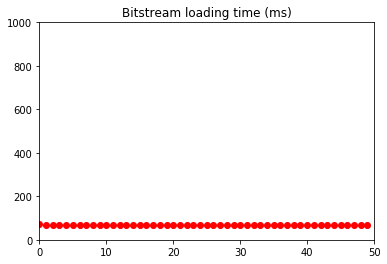

In [7]:
import time
import matplotlib.pyplot as plt

length = 50
time_log = []
for i in range(length):
    start = time.time()
    ol.download()
    end = time.time()
    time_log.append((end-start)*1000)

%matplotlib inline
plt.plot(range(length), time_log, 'ro')
plt.title('Bitstream loading time (ms)')
plt.axis([0, length, 0, 1000])
plt.show()

In [ ]:
PL.